# Loan Defaulter Detection

The team posited a hypothesis suggesting that the likelihood of loan default could be influenced by several key factors, as follows:

* Loan Amount
* Debt-to-Income Ratio
* Loan Type
* Rate of Interest
* Income
* Credit Worthiness
* Credit Score

It was hypothesized that these factors collectively impact the probability of loan default, suggesting that variations in these factors could affect the borrower's ability to meet their loan obligations.

### A. Import dependencies

In [1]:
import pandas as pd
from matplotlib import pyplot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, pearsonr, spearmanr
%matplotlib inline

### B. Import the clean dataset
Ensure that you have the Loan_Default.csv in the root directory for this, the link to the Kaggle site can be found in the README file.

In [2]:
df = pd.read_csv("Loan_Default_Cleaned.csv")

# Let's take a look at the first 5 rows
df.head()

,id,year,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,income,credit_score,...,construction_type,occupancy_type,secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,region,security_type
0,24890,2019,116500,4.201667,0.972767,3405.226667,360,118000.0000,1740,758,...,sb,pr,home,1U,EXP,CIB,25-34,to_inst,south,direct
1,24891,2019,206500,3.996667,0.677800,558.893333,360,281333.3333,4980,552,...,sb,pr,home,1U,EQUI,EXP,55-64,to_inst,North,direct
2,24892,2019,406500,4.560000,0.200000,595.000000,360,508000.0000,9480,834,...,sb,pr,home,1U,EXP,CIB,35-44,to_inst,south,direct
3,24893,2019,456500,4.250000,0.681000,124.500000,360,658000.0000,11880,587,...,sb,pr,home,1U,EXP,CIB,45-54,not_inst,North,direct
4,24894,2019,696500,4.000000,0.304200,0.000000,360,758000.0000,10440,602,...,sb,pr,home,1U,CRIF,EXP,25-34,not_inst,North,direct


### C. Explore Dataset

In [3]:
# There are 14,8670 rows with 34 columns/features.
df.shape

(148670, 34)

Look at the column breakdown for the dataset first, to see what we may be dealing with

In [4]:
# Reveals column information, such as number of rows that are not null, and the data type held
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_amount                148670 non-null  int64  
 3   rate_of_interest           148670 non-null  float64
 4   interest_rate_spread       148670 non-null  float64
 5   upfront_charges            148670 non-null  float64
 6   term                       148670 non-null  int64  
 7   property_value             148670 non-null  float64
 8   income                     148670 non-null  int64  
 9   credit_score               148670 non-null  int64  
 10  ltv                        148670 non-null  float64
 11  status                     148670 non-null  int64  
 12  dtir1                      148670 non-null  float64
 13  loan_limit                 14

In [5]:
df.describe()

,id,year,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,income,credit_score,ltv,status,dtir1
count,148670.000000,148670.0,1.486700e+05,148670.000000,148670.000000,148670.000000,148670.000000,1.486700e+05,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000
mean,99224.500000,2019.0,3.311177e+05,4.028634,0.440776,3117.482265,335.129717,4.936154e+05,6952.422412,699.789103,73.273993,0.246445,37.933114
std,42917.476598,0.0,1.839093e+05,0.525193,0.492539,2966.166712,58.407773,3.557329e+05,6383.046255,115.875857,39.792589,0.430942,10.061503
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.091500,910.550000,360.000000,2.680000e+05,3780.000000,599.000000,62.152778,0.000000,32.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.393400,2582.518334,360.000000,4.180000e+05,5760.000000,699.000000,75.519474,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.758700,4444.562500,360.000000,6.180000e+05,8520.000000,800.000000,86.139456,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


### D. Data Cleaning

In [6]:
# lowercase all columns name for standardisation purposes
df.columns = df.columns.str.lower()

There are way more rejected status than accepted. Have to reduce status=1 for the training of model.

In [7]:
df.status.value_counts()

status
0    112031
1     36639
Name: count, dtype: int64

## E. EDA

## Univariate Analysis

Explores each variable in a data set, separately.

*Insights*: Not many valuable insights. 

* There are significantly more loans application for <b>type 1</b> than type 2 & 3
* Majority of the loan applicants has <b>l1</b> credit worthiness. 
* More loans applications are declined than approved.
<hr>
* More loan application are made by people in the age range of <b> 35-64 years old </b>
* Type of collateral used for the loans are <b>housing</b>
* Majority opted for <b>direct collateral security</b>, meaning the collateral security obstained from the borrower himself to secure his own account. 
* Majority uses <b>primary residence</b> for its occupancy type




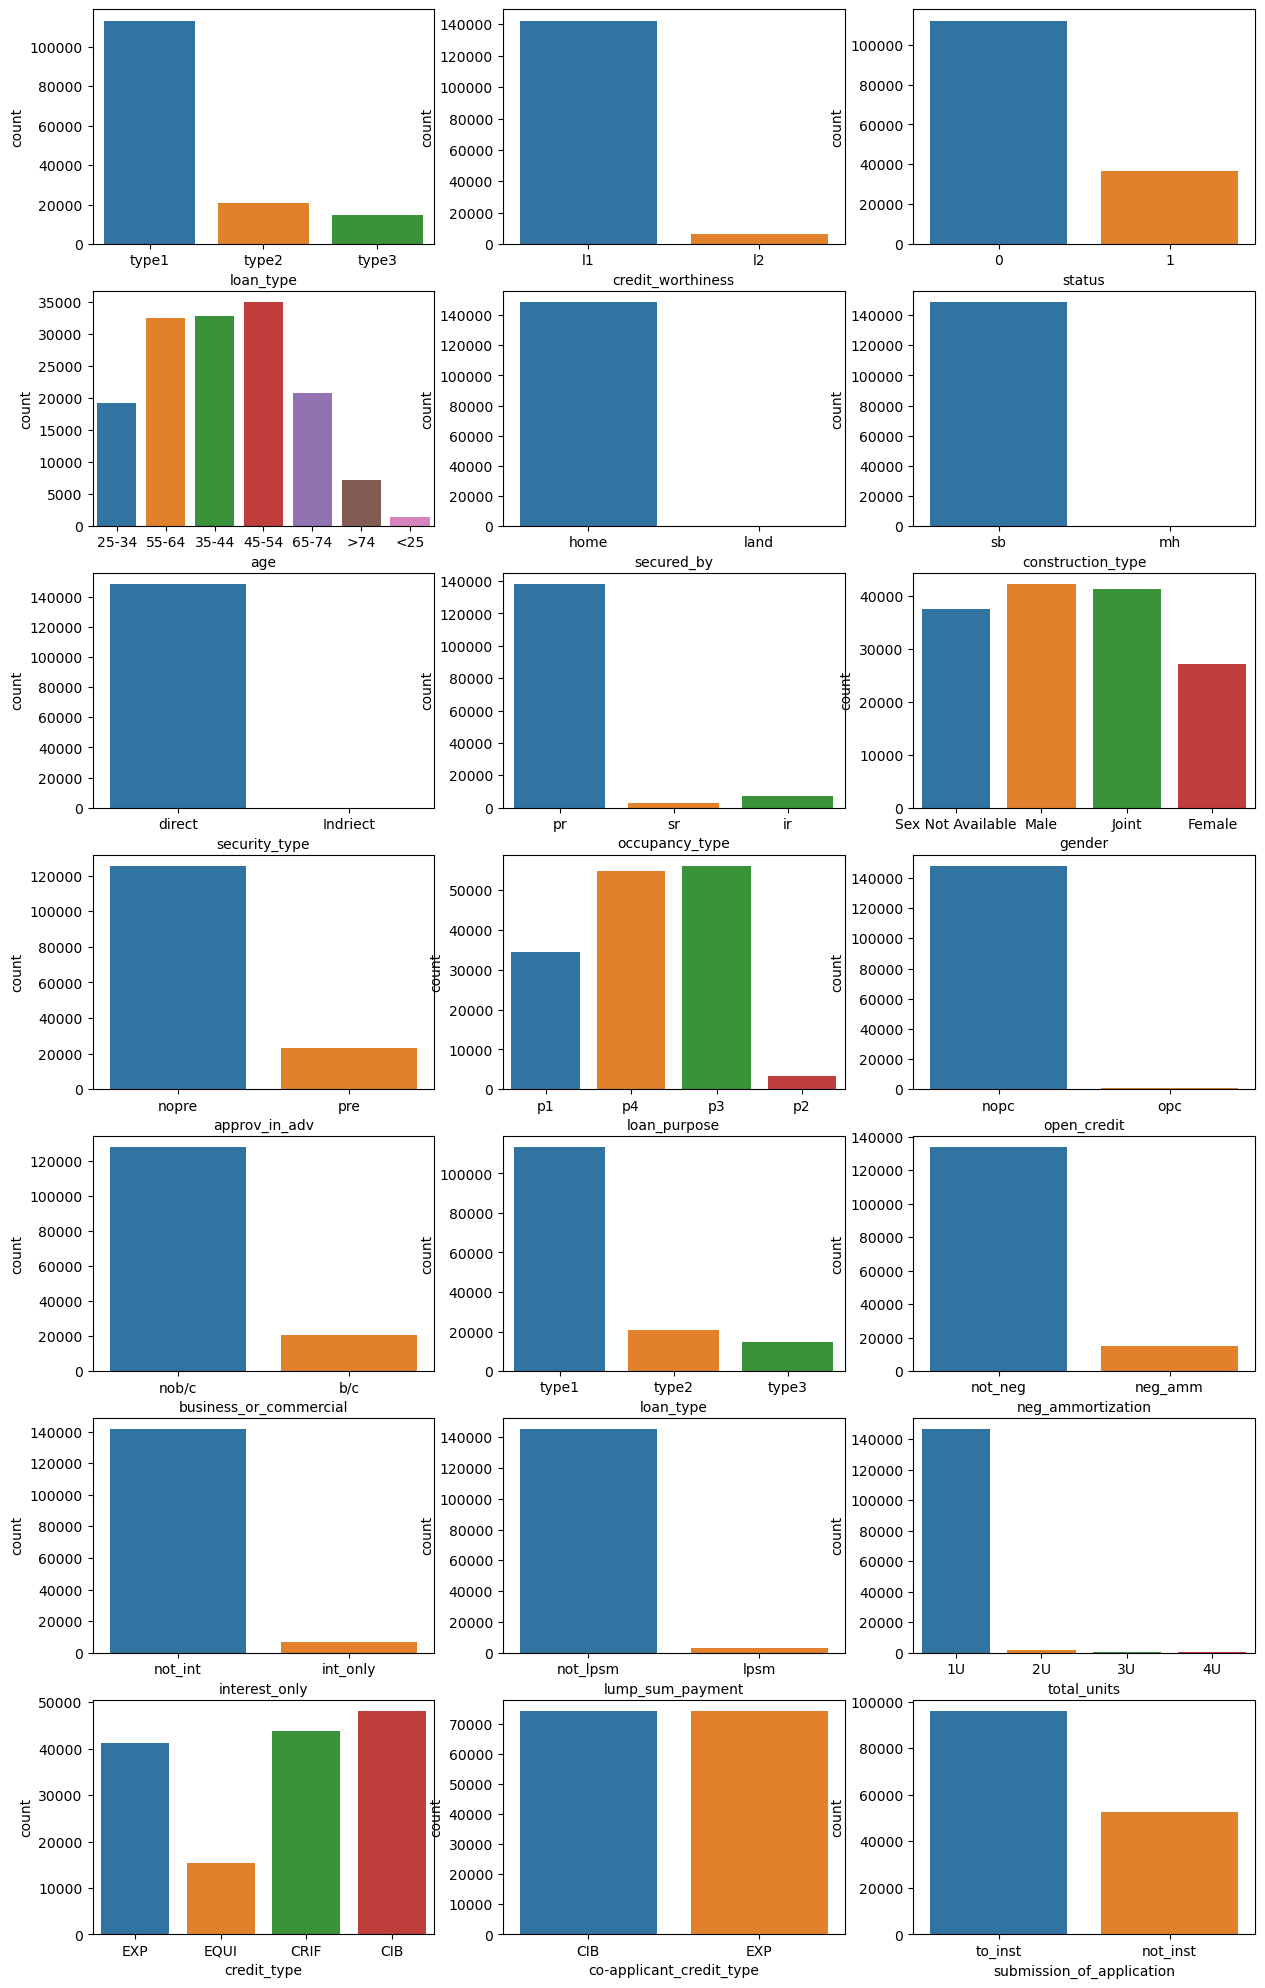

In [8]:
# Looking into Cateogiral columns
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15,25))

categorical_variables = ["loan_type","credit_worthiness","status", "age","secured_by","construction_type","security_type","occupancy_type","gender", "approv_in_adv", "loan_purpose","open_credit","business_or_commercial","loan_type","neg_ammortization","interest_only","lump_sum_payment","total_units","credit_type","co-applicant_credit_type","submission_of_application","region"]

i = 0;
while i < 21:
    for row in range(7):
        for col in range(3):
            sns.countplot(ax=axes[row][col], data=df, x=categorical_variables[i])
            i += 1


## Skewness

*Rule of thumb*:
- If skewness is <b>less than -1 or greater than 1</b>, the distribution is <b>highly</b> skewed.
- If skewness is <b>between -1 and -0.5 or between 0.5 and 1</b>, the distribution is </b>moderately</b> skewed.
- If skewness is <b>between -0.5 and 0.5</b>, the distribution is approximately <b>symmetric</b>.

*Insights*: Some columns are heavily skewed and requires a log transformation.
* loan amount, upfront_charges, property_value, income, ltv are heavily skewed

Skewness for loan_amount: 1.6669980938622415
Skewness for rate_of_interest: 0.4263518359756306
Skewness for interest_rate_spread: 0.2811339141058598
Skewness for upfront_charges: 1.885776951257248
Skewness for property_value: 4.574136214916726
Skewness for income: 17.219042798791868
Skewness for ltv: 114.31171666301687
Skewness for dtir1: -0.5873846252208966


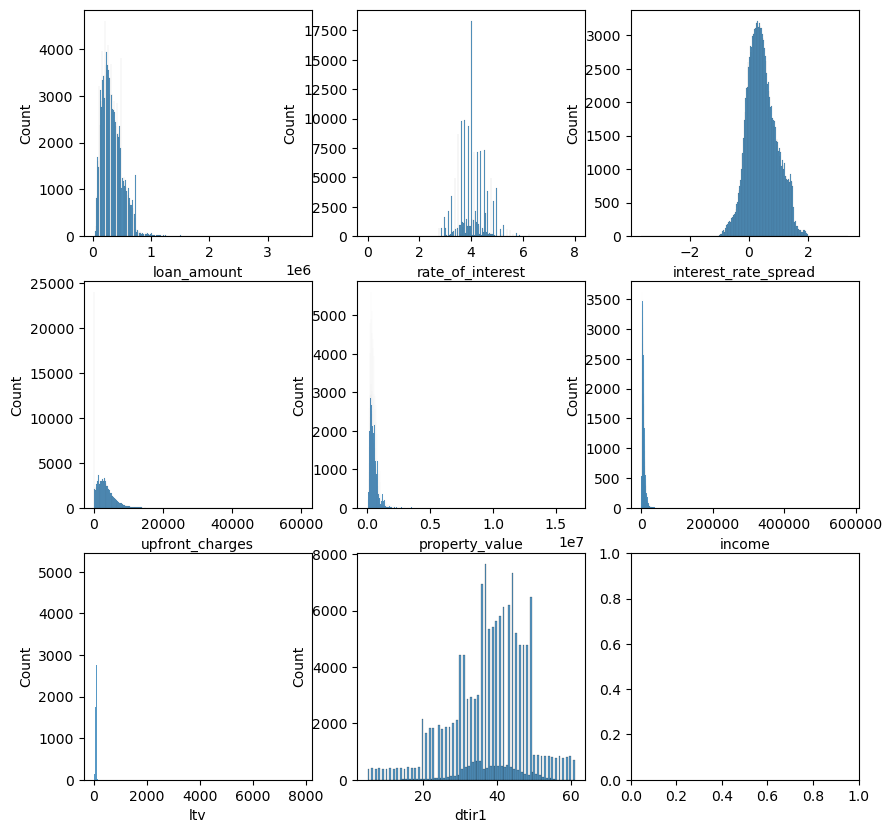

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))

numerical_cols = ['loan_amount', 'rate_of_interest','interest_rate_spread','upfront_charges','property_value','income','ltv','dtir1']

i = 0;
while i < len(numerical_cols):
    for row in range(3):
        for col in range(3):
            if i < len(numerical_cols):
                sns.histplot(ax=axes[row][col],data=df, x=numerical_cols[i])
                print("Skewness for " + numerical_cols[i] + ":", df[numerical_cols[i]].skew())
                i += 1

In [10]:
# there are some with (-inf) due to log(0)
df['log_loan_amount'] = np.log(df['loan_amount'])
df['log_upfront_charges'] = np.log(df['upfront_charges'])
df['log_property_value'] = np.log(df['property_value'])
df['log_income'] = np.log(df['income'])
df['log_ltv'] = np.log(df['ltv'])

C:\Users\jingy\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\jingy\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## Bivariate Analysis

It involves the analysis of two variables, for the purpose of determining the empirical relationship between them.

### Multicollinearity
*<b> Check for highly correlated features as these will be counted twice in the model. Double counting leads to overestimating the importance of those features. So, the performance of the Naive Bayes classifier degrades.</b>*

To detect and eliminate them, we can use a correlation matrix to compare feature pairs.

<b>Insights</b>: 

Looking at the correlation between features, we can see that these features are highly related.
- rate_of_interest & interest_rate_spread
- loan_amount & property_value
- income & loan_amount 

<AxesSubplot: >

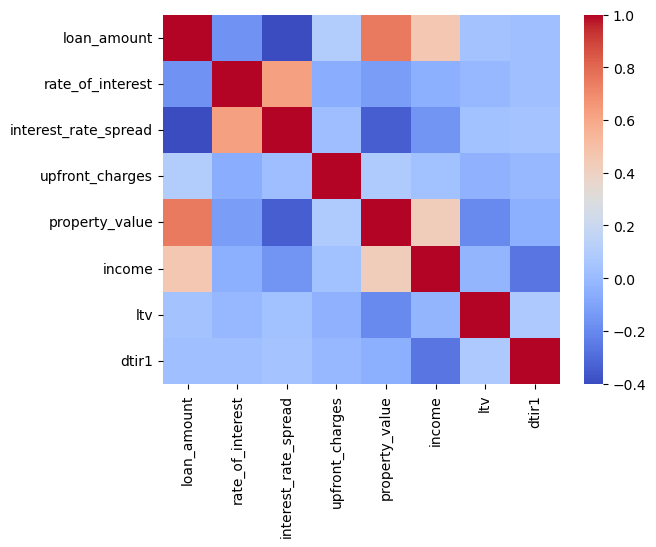

In [11]:
sns.heatmap(data=df[['loan_amount', 'rate_of_interest','interest_rate_spread','upfront_charges','property_value','income','ltv','dtir1']].corr(numeric_only= True), annot=False, cmap='coolwarm')

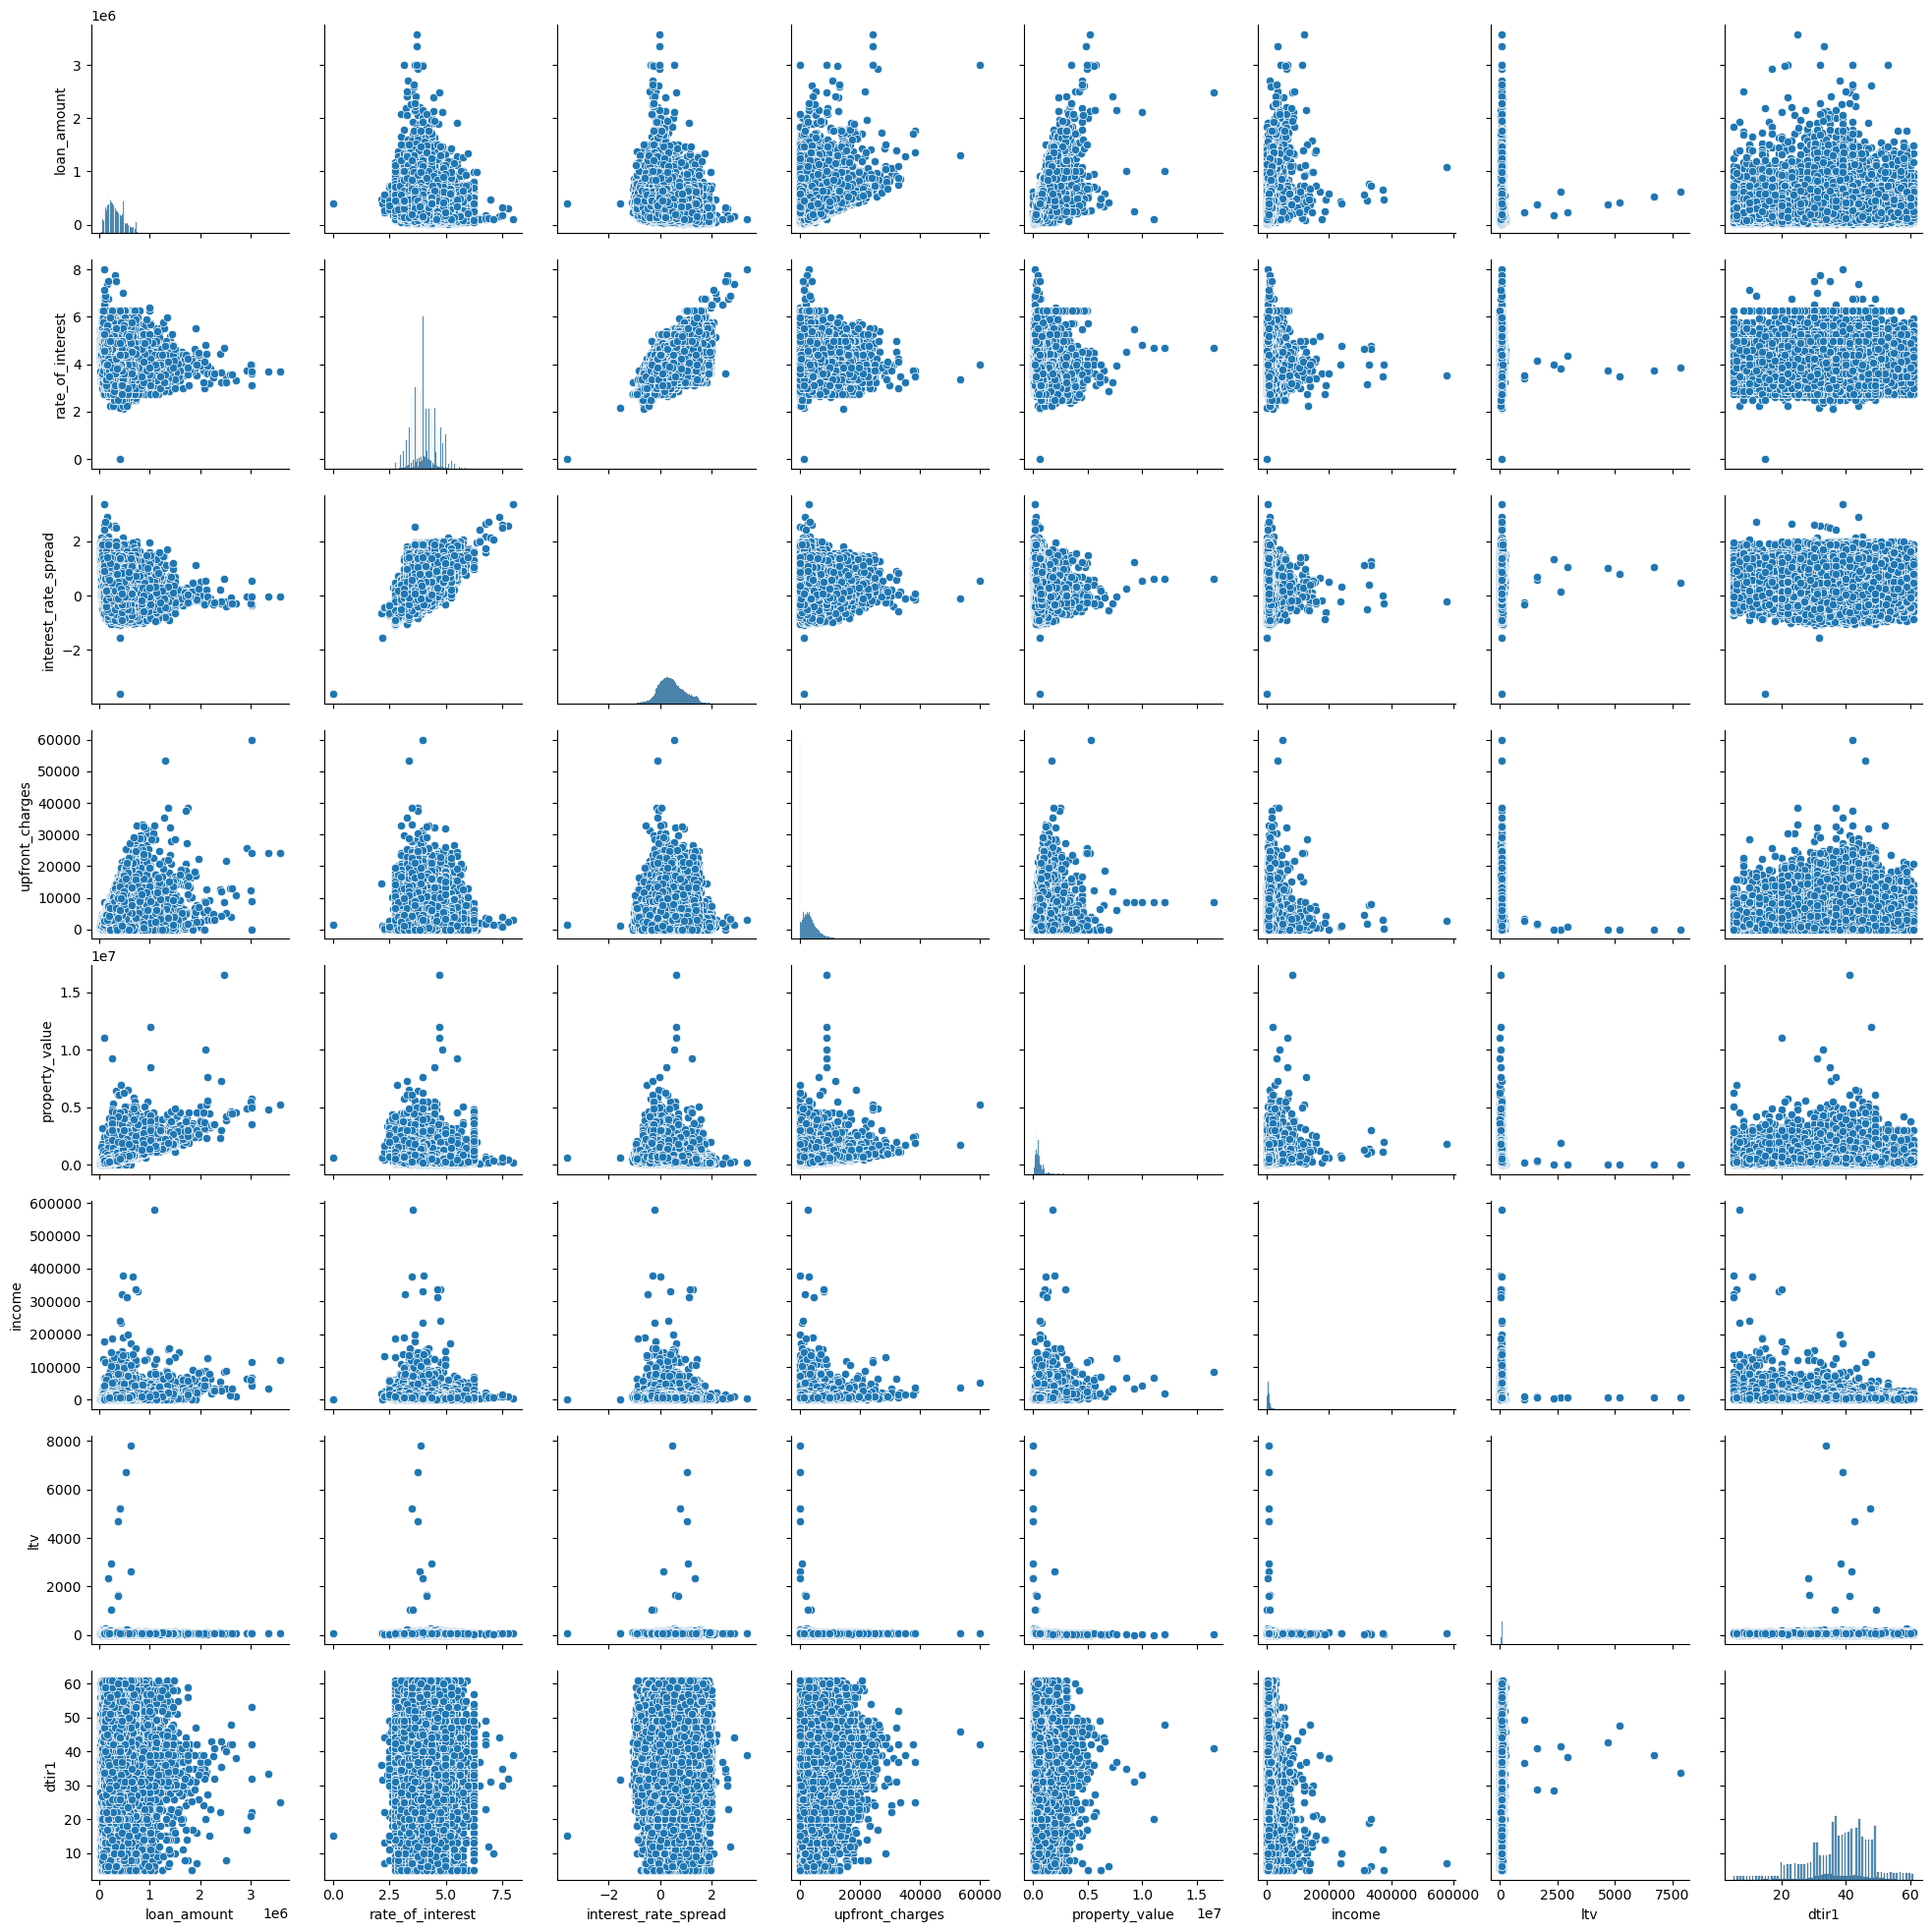

In [12]:
sns.pairplot(df[['loan_amount', 'rate_of_interest','interest_rate_spread','upfront_charges','property_value','income','ltv','dtir1']])

#### To see in detail

Convert the important categorical variable to numerical form for correlation testing

In [13]:
# loan type
df["loan_type"] = df["loan_type"].replace("type1", 1)
df["loan_type"] = df["loan_type"].replace("type2", 2)
df["loan_type"] = df["loan_type"].replace("type3", 3)

# Credit Worthiness
df["credit_worthiness"] = df["credit_worthiness"].replace("l1", 1)
df["credit_worthiness"] = df["credit_worthiness"].replace("l2", 2)

# Gender (testing)
df["gender"] = df["gender"].replace("Male", 1)
df["gender"] = df["gender"].replace("Female", 2)
df["gender"] = df["gender"].replace("Joint", 3)
df["gender"] = df["gender"].replace("Sex Not Available", 4)

We can first look at the correlation between the important variables and loan status (categorical).

These variables are:
1. Debt-to-income (continuous)
2. Loan Amount (continuous)
3. Loan Type (categorical)
4. Rate of interest (continuous)
5. Credit worthiness (categorical)
6. Credit Score (continuous)
7. Income (continuous)

Check correlation between individual important features and the loan status (chance of default)

*Insight*: <b> The lower the income, the higher change of default </b>

In [14]:
# Pearson (linear correlation between continuous-continuous or continuous-categorical variables)
debt_status_corr_p, _ = pearsonr(df["dtir1"], df["status"])
debt_status_corr_s, _ = spearmanr(df["dtir1"], df["status"])

# Gender (Experimental Secondary Analysis) - Categorical-categorical, needs chi-square test
gender_status_contingency_table = pd.crosstab(df["gender"], df["status"])
g_s_chi2, g_s_p_value, _, _ = chi2_contingency(gender_status_contingency_table)
la_status_corr_p, _ = pearsonr(df["loan_amount"], df["status"])
la_status_corr_s, lasp, = spearmanr(df["loan_amount"], df["status"])
lt_status_corr_p, _ = pearsonr(df["loan_type"], df["status"]) 
lt_status_corr_s, _ = spearmanr(df["loan_type"], df["status"]) 
roi_status_corr_p, _ = pearsonr(df["rate_of_interest"], df["status"])
roi_status_corr_s, _ = spearmanr(df["rate_of_interest"], df["status"])
cw_status_corr_p, _ = pearsonr(df["credit_worthiness"], df["status"])
cw_status_corr_s, _ = spearmanr(df["credit_worthiness"], df["status"])
cs_status_corr_p, _ = pearsonr(df["credit_score"], df["status"])
cs_status_corr_s, _ = spearmanr(df["credit_score"], df["status"])
income_status_corr_p, _ = pearsonr(df["income"], df["status"])
income_status_corr_s, iscs_p = spearmanr(df["income"], df["status"])

print("Debt Status - Status Correlation (pearson, spearman):", debt_status_corr_p, debt_status_corr_s) 
print("Gender - Status Correlation (chi-square, p_value):", g_s_chi2, g_s_p_value) 
print("Loan Amount - Status Correlation (pearson, spearman, p_value):", la_status_corr_p, la_status_corr_s, lasp)
print("Loan Type - Status Correlation (pearson, spearman):", lt_status_corr_p, lt_status_corr_s)
print("Rate of Interest - Status Correlation (pearson, spearman):", roi_status_corr_p, roi_status_corr_s) 
print("Credit Worthiness - Status Correlation (pearson, spearman):", cw_status_corr_p, cw_status_corr_s) 
print("Credit Score - Status Correlation (pearson, spearman):", cs_status_corr_p, cs_status_corr_s) 
print("\n")
# small negative non-linear correlation => lower the income, higher the chance of defaulting
print("Income - Status Correlation (pearson, spearman, p_value):", income_status_corr_p, income_status_corr_s, iscs_p) 

Debt Status - Status Correlation (pearson, spearman): 0.0650436797362532 0.06712277270727421
Gender - Status Correlation (chi-square, p_value): 1043.6008495787444 6.260048330360408e-226
Loan Amount - Status Correlation (pearson, spearman, p_value): -0.03682527554437443 -0.06884161419818988 1.3178355318827435e-155
Loan Type - Status Correlation (pearson, spearman): 0.05230050103337099 0.06968855795703871
Rate of Interest - Status Correlation (pearson, spearman): -0.05426130487241691 -0.04286717194156949
Credit Worthiness - Status Correlation (pearson, spearman): 0.03487492152652664 0.03487492152652677
Credit Score - Status Correlation (pearson, spearman): 0.004003693595588178 0.003985708677723151


Income - Status Correlation (pearson, spearman, p_value): -0.06487852779435647 -0.13796037225702099 0.0


Check correlation between the debt status and other features

In [15]:
debt_la_corr = np.corrcoef(df["dtir1"], df["loan_amount"])[0, 1]
debt_lt_corr = np.corrcoef(df["dtir1"], df["loan_type"])[0, 1]
debt_roi_corr = np.corrcoef(df["dtir1"], df["rate_of_interest"])[0, 1]
debt_cw_corr = np.corrcoef(df["dtir1"], df["credit_worthiness"])[0, 1]
debt_cs_corr = np.corrcoef(df["dtir1"], df["credit_score"])[0, 1]
debt_income_corr = np.corrcoef(df["dtir1"], df["income"])[0, 1]

print("Debt Status - Loan Amount Correlation:", debt_la_corr) 
print("Debt Status - Loan Type Correlation:", debt_lt_corr) 
print("Debt Status - Rate of Interest Correlation:", debt_roi_corr) 
print("Debt Status - Credit Worthiness Correlation:", debt_cw_corr) 
print("Debt Status - Credit Score Correlation:", debt_cs_corr) 
print("Debt Status - Income Correlation:", debt_income_corr)

Debt Status - Loan Amount Correlation: 0.020394626396533323
Debt Status - Loan Type Correlation: 0.16967228189834702
Debt Status - Rate of Interest Correlation: 0.0244437443615393
Debt Status - Credit Worthiness Correlation: 0.010529597751224081
Debt Status - Credit Score Correlation: -0.0009061861477149188
Debt Status - Income Correlation: -0.265382029299125


Check correlation between the loan amount and other features

*Insight* :
<b> Loan Amount & Income Correlation has a stronger relation </b>

In [16]:
la_lt_corr = np.corrcoef(df["loan_amount"], df["loan_type"])[0, 1]
la_roi_corr = np.corrcoef(df["loan_amount"], df["rate_of_interest"])[0, 1]
la_cw_corr = np.corrcoef(df["loan_amount"], df["credit_worthiness"])[0, 1]
la_cs_corr = np.corrcoef(df["loan_amount"], df["credit_score"])[0, 1]
la_income_corr = np.corrcoef(df["loan_amount"], df["income"])[0, 1]

print("Loan Amount - Loan Type Correlation:", la_lt_corr) 
print("Loan Amount - Rate of Interest Correlation:", la_roi_corr) 
print("Loan Amount - Credit Worthiness Correlation:", la_cw_corr) 
print("Loan Amount - Credit Score Correlation:", la_cs_corr) 
print("Loan Amount - Income Correlation:", la_income_corr) # Larger corr at 0.45

Loan Amount - Loan Type Correlation: -0.07220072797877868
Loan Amount - Rate of Interest Correlation: -0.16742013401039238
Loan Amount - Credit Worthiness Correlation: -0.01420659078800965
Loan Amount - Credit Score Correlation: 0.004438286387009896
Loan Amount - Income Correlation: 0.4594764229791995


Check correlation between the loan type and other features

In [17]:
lt_roi_corr = np.corrcoef(df["loan_type"], df["rate_of_interest"])[0, 1]
# Categorical-categorical, needs chi-square test
lt_cw_contingency_table = pd.crosstab(df["loan_type"], df["credit_worthiness"])
chi2, p_value, _, _ = chi2_contingency(lt_cw_contingency_table)
# lt_cw_corr = np.corrcoef(df["loan_type"], df["credit_worthiness"])[0, 1]
lt_cs_corr = np.corrcoef(df["loan_type"], df["credit_score"])[0, 1]
lt_income_corr = np.corrcoef(df["loan_type"], df["income"])[0, 1]

print("Loan Type - Rate of Interest Correlation:", lt_roi_corr) 
print("Loan Type - Credit Worthiness Correlation (is p-value < 0.05?):", p_value < 0.05) 
print("Loan Type - Credit Score Correlation:", lt_cs_corr) 
print("Loan Type - Income Correlation:", lt_income_corr)

Loan Type - Rate of Interest Correlation: -0.2152329046466126
Loan Type - Credit Worthiness Correlation (is p-value < 0.05?): True
Loan Type - Credit Score Correlation: -0.004336113677631871
Loan Type - Income Correlation: -0.1206057857642451


Check correlation between rate of interest and other features

In [18]:
roi_cw_corr = np.corrcoef(df["rate_of_interest"], df["credit_worthiness"])[0, 1]
roi_cs_corr = np.corrcoef(df["rate_of_interest"], df["credit_score"])[0, 1]
roi_income_corr = np.corrcoef(df["rate_of_interest"], df["income"])[0, 1]

print("Rate of Interest - Credit Worthiness Correlation:", roi_cw_corr) 
print("Rate of Interest - Credit Score Correlation:", roi_cs_corr) 
print("Rate of Interest - Income Correlation:", roi_income_corr)

Rate of Interest - Credit Worthiness Correlation: 0.11611728644817877
Rate of Interest - Credit Score Correlation: -0.0025959595561051434
Rate of Interest - Income Correlation: -0.05624970194478906


Check correlation between credit worthiness and other features

In [19]:
cw_cs_corr = np.corrcoef(df["credit_worthiness"], df["credit_score"])[0, 1]
cw_income_corr = np.corrcoef(df["credit_worthiness"], df["income"])[0, 1]

print("Credit Worthiness - Credit Score Correlation:", cw_cs_corr) 
print("Credit Worthiness - Income Correlation:", cw_income_corr)

Credit Worthiness - Credit Score Correlation: 0.0013752950684136137
Credit Worthiness - Income Correlation: 0.01618631658910471


Last one - credit score vs income correlation

In [20]:
cs_income_corr = np.corrcoef(df["credit_score"], df["income"])[0, 1]
cs_income_corr_s, cicsp = spearmanr(df["credit_score"], df["income"])

print("Credit Score - Income Correlation:", cs_income_corr, cs_income_corr_s)

Credit Score - Income Correlation: 0.00040571071660788375 0.0008275309517065686


Change back the columns that were renamed for the correlation analysis.

In [21]:
# loan type
df["loan_type"] = df["loan_type"].replace(1, "type1")
df["loan_type"] = df["loan_type"].replace(2, "type2")
df["loan_type"] = df["loan_type"].replace(3, "type3")

# Credit Worthiness
df["credit_worthiness"] = df["credit_worthiness"].replace(1, "l1")
df["credit_worthiness"] = df["credit_worthiness"].replace(2, "l2")

# Gender (testing)
df["gender"] = df["gender"].replace(1, "Male")
df["gender"] = df["gender"].replace(2, "Female")
df["gender"] = df["gender"].replace(3, "Joint")
df["gender"] = df["gender"].replace(4, "Sex Not Available")


### Status vs Other Features

Plotting the other features against the outcome variable (status)

*Insights*: 

* Rate of interest: The spread is slightly bigger for 'rejected' than 'approved'
* Dtir1: The IQR is higher for 'approved' than 'rejected'.
* Loan Amount: There are more outliers and wider range of outliers for 'approved' than 'rejected'


<AxesSubplot: xlabel='status', ylabel='ltv'>

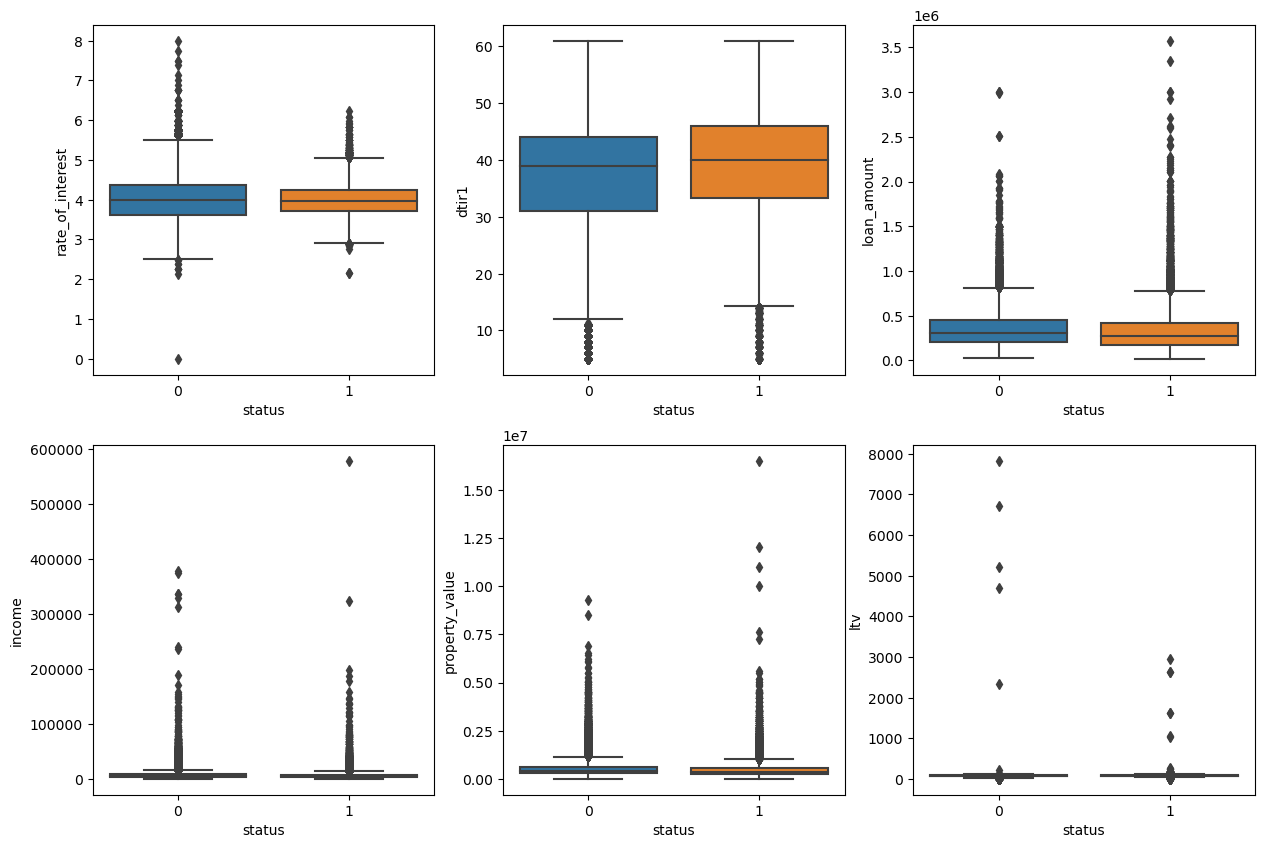

In [22]:
# continous variables
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.boxplot(ax=axes[0,0], data=df, x='status', y='rate_of_interest')
sns.boxplot(ax=axes[0,1],data=df, x='status', y='dtir1')
sns.boxplot(ax=axes[0,2],data=df, x='status', y='loan_amount')
sns.boxplot(ax=axes[1,0],data=df, x='status', y='income')
sns.boxplot(ax=axes[1,1],data=df, x='status', y='property_value')
sns.boxplot(ax=axes[1,2],data=df, x='status', y='ltv')

<AxesSubplot: xlabel='id', ylabel='ltv'>

C:\Users\jingy\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\jingy\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


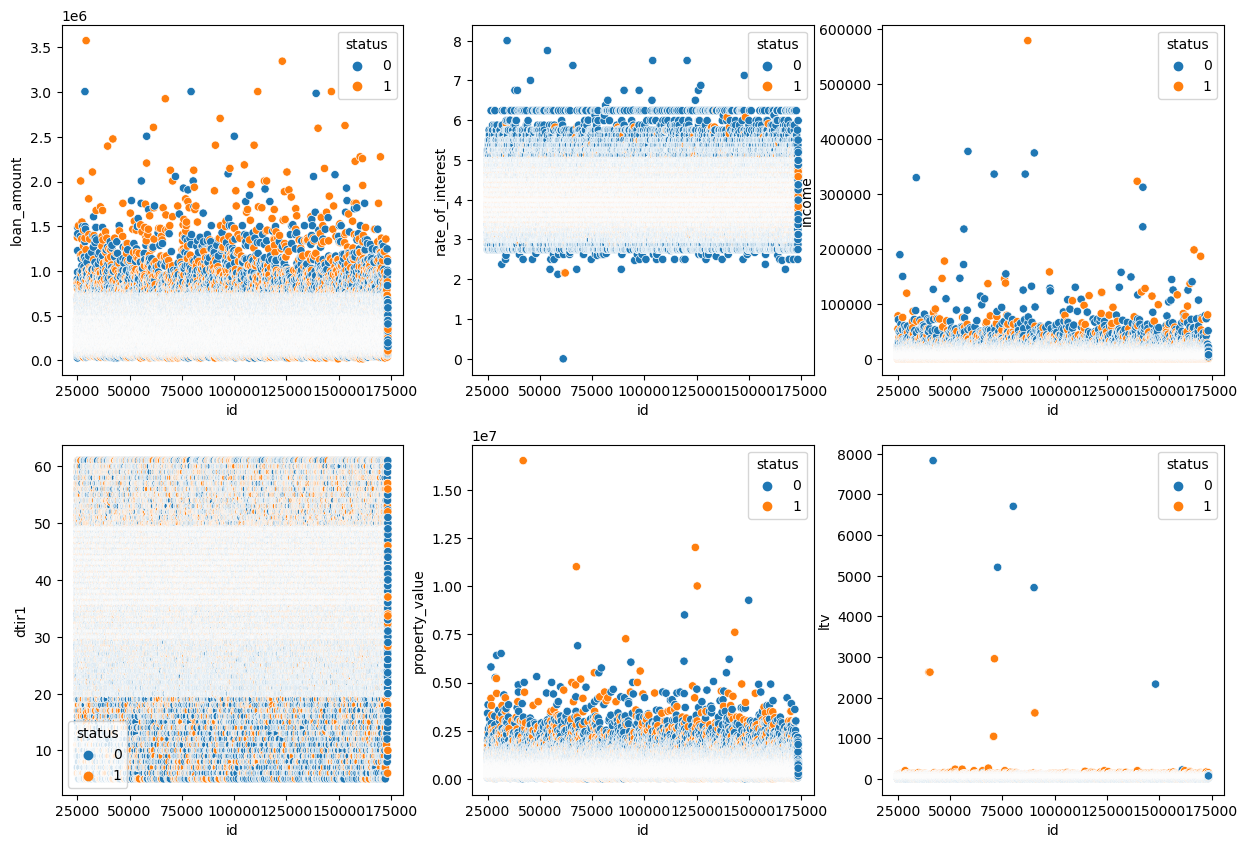

In [23]:
# continous variables
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.scatterplot(ax=axes[0,0],data=df, x='id', y='loan_amount', hue='status')
sns.scatterplot(ax=axes[0,1],data=df, x='id', y='rate_of_interest', hue='status')
sns.scatterplot(ax=axes[0,2],data=df, x='id', y='income', hue='status')
sns.scatterplot(ax=axes[1,0],data=df, x='id', y='dtir1', hue='status')
sns.scatterplot(ax=axes[1,1],data=df, x='id', y='property_value', hue='status')
sns.scatterplot(ax=axes[1,2],data=df, x='id', y='ltv', hue='status')

*Insight*:
* Loan Type: <b>Type 2</b> has a higher approved rate.
* Credit Worthiness: <b>l2</b> has a higher approved rate.

<hr>

* neg_ammortisation: not_neg has a significantly higher (77%) of rejected status

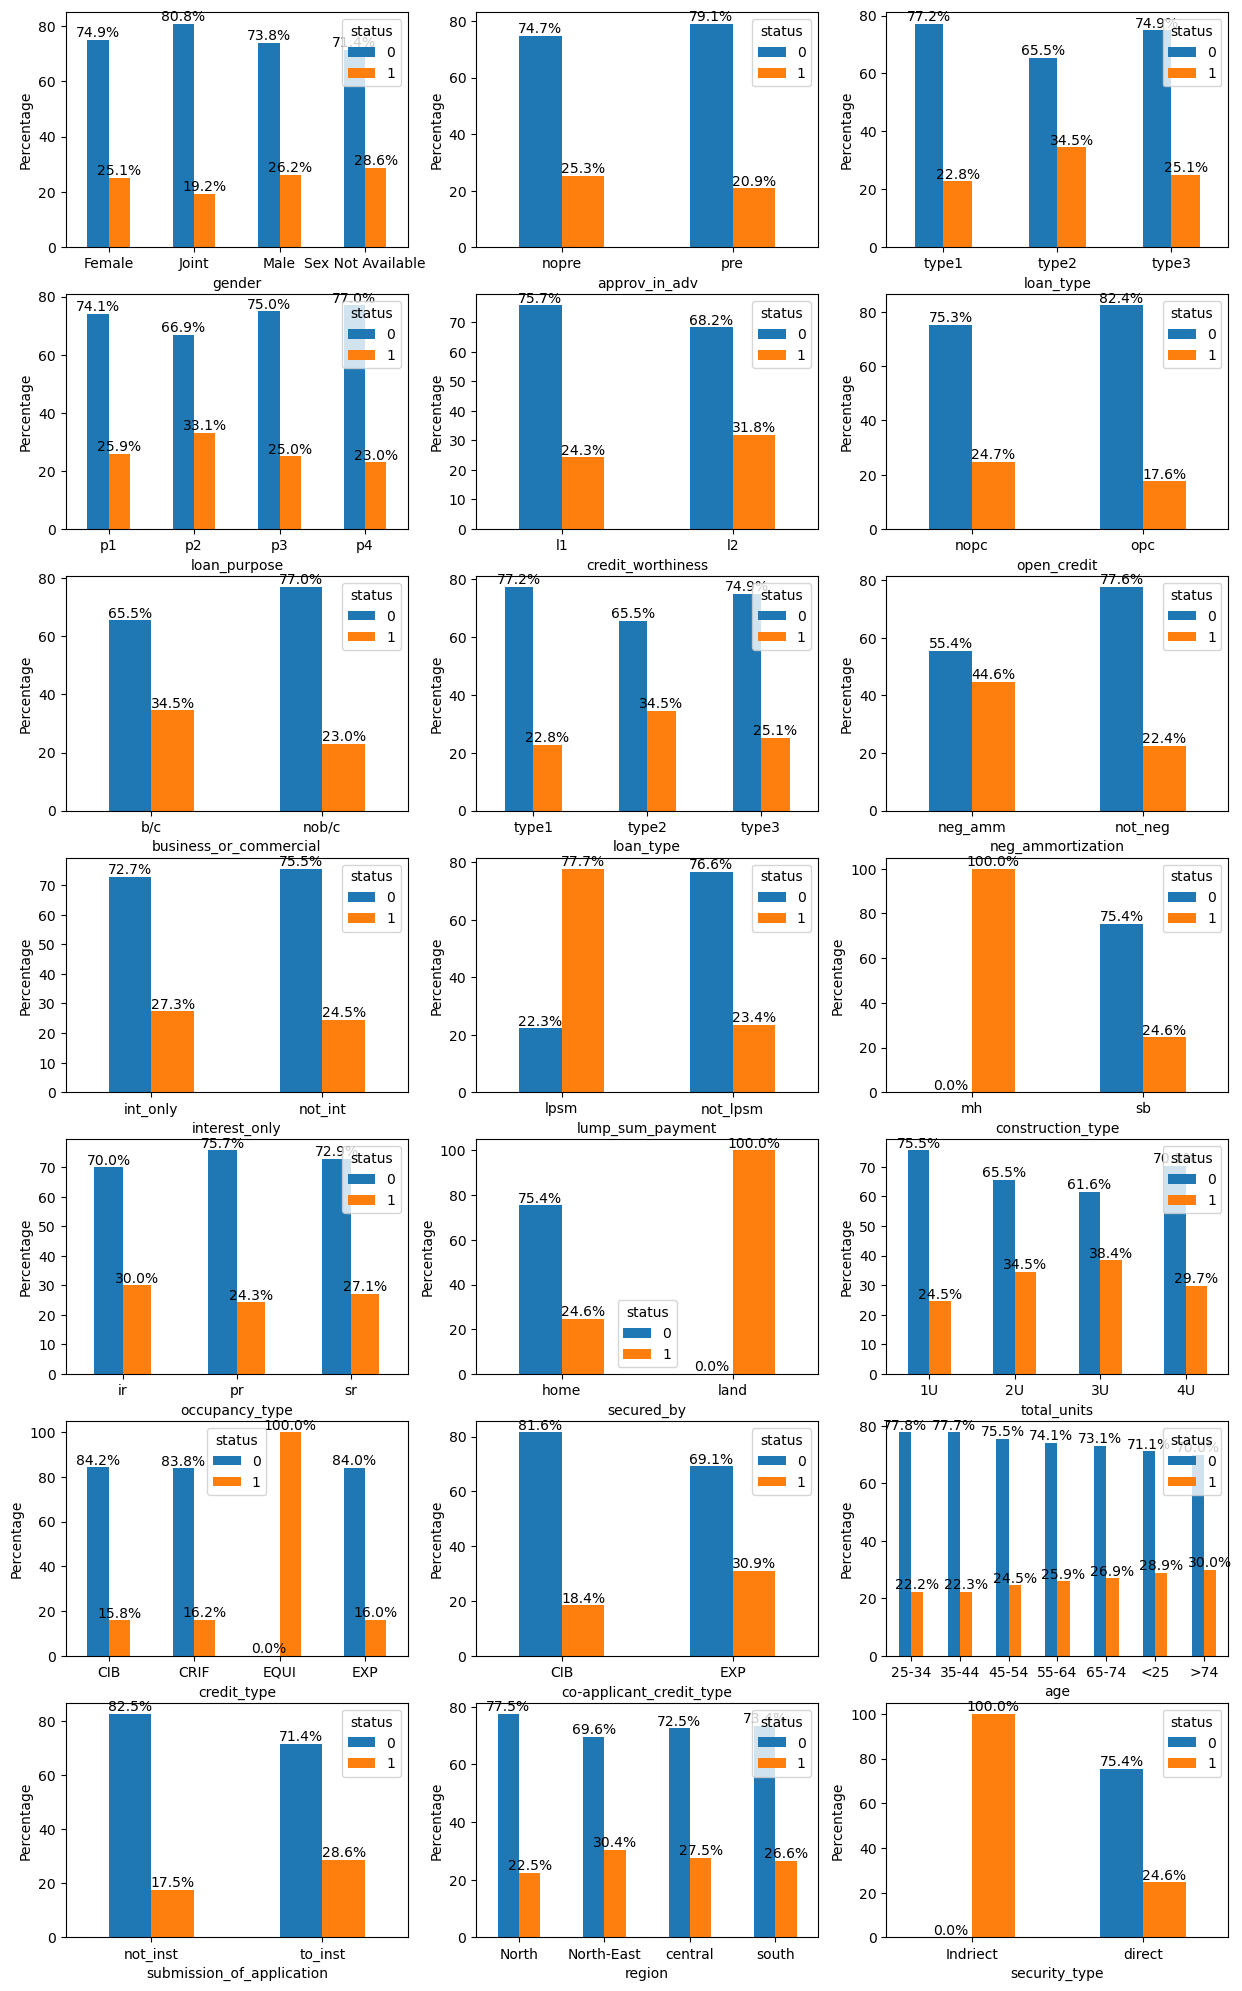

In [24]:
# Categorical variables
fig, axes = plt.subplots(nrows=7, ncols=3)

categorical_variables = ["gender", "approv_in_adv", "loan_type","loan_purpose","credit_worthiness","open_credit","business_or_commercial","loan_type","neg_ammortization","interest_only","lump_sum_payment","construction_type","occupancy_type","secured_by","total_units","credit_type","co-applicant_credit_type","age","submission_of_application","region","security_type"]

i = 0;
while i < 21:
    for row in range(7):
        for col in range(3):
            df_new = df[[categorical_variables[i], "status"]]

            df_pivot = pd.pivot_table(df_new, index=categorical_variables[i], columns='status', aggfunc=len, fill_value=0)
            df_percent = df_pivot.div(df_pivot.sum(axis=1), axis=0).mul(100).round(1)

            p1 = df_percent.plot(kind='bar', figsize=(15, 25), rot=0, ylabel='Percentage',ax=axes[row,col])

            for p in p1.containers:
                p1.bar_label(p, fmt='%.1f%%', label_type='edge')
                
            axes[row, col].tick_params(axis='x', rotation=360)
            i += 1
            
plt.show()

## F. One Hot Encoding

We have to 1-hot encode the data. This converts categorical values into numerical values, to provide standardization such that ML models can work with the data.

The columns that are categorical are:
1. loan_limit
2. gender
3. approv_in_adv
4. loan_type
5. loan_purpose
6. Credit_Worthiness
7. open_credit
8. business_or_commercial
9. neg_ammortization
10. Lump_sum_payment
11. Construction_type
12. Occupancy_type
13. Secured_by
14. Total_units
15. credit_type
16. Co-applicant_credit_type
17. Age
18. Submission_of_application
19. Region
20. Security_type

In [25]:
columns_to_encode = [
    'loan_limit',
    'gender',
    'approv_in_adv',
    'loan_type',
    'loan_purpose',
    'credit_worthiness',
    'open_credit',
    'business_or_commercial',
    'neg_ammortization',
    'lump_sum_payment',
    'construction_type',
    'occupancy_type',
    'secured_by',
    'total_units',
    'credit_type',
    'co-applicant_credit_type',
    'age',
    'submission_of_application',
    'region',
    'security_type',
]

# Perform the encoding and view the new df
one_hot_encoded_df = pd.get_dummies(df, columns=columns_to_encode)
one_hot_encoded_df.head()

,id,year,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,income,credit_score,...,age_<25,age_>74,submission_of_application_not_inst,submission_of_application_to_inst,region_North,region_North-East,region_central,region_south,security_type_Indriect,security_type_direct
0,24890,2019,116500,4.201667,0.972767,3405.226667,360,118000.0000,1740,758,...,False,False,False,True,False,False,False,True,False,True
1,24891,2019,206500,3.996667,0.677800,558.893333,360,281333.3333,4980,552,...,False,False,False,True,True,False,False,False,False,True
2,24892,2019,406500,4.560000,0.200000,595.000000,360,508000.0000,9480,834,...,False,False,False,True,False,False,False,True,False,True
3,24893,2019,456500,4.250000,0.681000,124.500000,360,658000.0000,11880,587,...,False,False,True,False,True,False,False,False,False,True
4,24894,2019,696500,4.000000,0.304200,0.000000,360,758000.0000,10440,602,...,False,False,True,False,True,False,False,False,False,True


In [26]:
# lowercase all the column names again
one_hot_encoded_df.columns = one_hot_encoded_df.columns.str.lower()

In [27]:
one_hot_encoded_df

,id,year,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,income,credit_score,...,age_<25,age_>74,submission_of_application_not_inst,submission_of_application_to_inst,region_north,region_north-east,region_central,region_south,security_type_indriect,security_type_direct
0,24890,2019,116500,4.201667,0.972767,3405.226667,360,118000.0000,1740,758,...,False,False,False,True,False,False,False,True,False,True
1,24891,2019,206500,3.996667,0.677800,558.893333,360,281333.3333,4980,552,...,False,False,False,True,True,False,False,False,False,True
2,24892,2019,406500,4.560000,0.200000,595.000000,360,508000.0000,9480,834,...,False,False,False,True,False,False,False,True,False,True
3,24893,2019,456500,4.250000,0.681000,124.500000,360,658000.0000,11880,587,...,False,False,True,False,True,False,False,False,False,True
4,24894,2019,696500,4.000000,0.304200,0.000000,360,758000.0000,10440,602,...,False,False,True,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,436500,3.125000,0.257100,9960.000000,180,608000.0000,7860,659,...,False,False,False,True,False,False,False,True,False,True
148666,173556,2019,586500,5.190000,0.854400,0.000000,360,788000.0000,7140,569,...,False,False,True,False,False,False,False,True,False,True
148667,173557,2019,446500,3.125000,0.081600,1226.640000,180,728000.0000,6900,702,...,False,False,True,False,True,False,False,False,False,True
148668,173558,2019,196500,3.500000,0.582400,4323.330000,180,278000.0000,7140,737,...,False,False,False,True,True,False,False,False,False,True


Important Columns

In [28]:
impt_cols = ['dtir1', 'loan_amount', 'loan_type_type1', 'loan_type_type2', 'loan_type_type3', 'credit_worthiness_l1', 'credit_worthiness_l2', 'credit_score', 'income', 'rate_of_interest']

impt_cols_with_no_encoding = ['loan_amount', 'loan_type', 'credit_worthiness', 'rate_of_interest', 'income','credit_score','dtir1', 'status']

In [29]:
impt_df = one_hot_encoded_df[impt_cols]

In [30]:
impt_df.head()

,dtir1,loan_amount,loan_type_type1,loan_type_type2,loan_type_type3,credit_worthiness_l1,credit_worthiness_l2,credit_score,income,rate_of_interest
0,45.000000,116500,True,False,False,True,False,758,1740,4.201667
1,36.333333,206500,False,True,False,True,False,552,4980,3.996667
2,46.000000,406500,True,False,False,True,False,834,9480,4.560000
3,42.000000,456500,True,False,False,True,False,587,11880,4.250000
4,39.000000,696500,True,False,False,True,False,602,10440,4.000000


# Conclusion

When looking at the features alone with the status, there is no clear indicator that it affects the probability of default. 

However, some insights that we found are as followed: 
* Income: The lower the income, the higher chance of default
* Rate of interest: The interquartile range is slightly wider for 'rejected' than 'approved'
* Dtir1: The median and IQR range for 'approved' is higher than 'rejected'.
* Loan Amount: There are more outliers and wider range of outliers for 'approved' than 'rejected'
* Loan Type: Type 2 has a higher approved rate.
* Credit Worthiness: l2 has a higher approved rate.